In [420]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingRegressor, BaggingClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score, \
    f1_score, log_loss, classification_report, roc_curve, auc, roc_auc_score, r2_score

import matplotlib.pyplot as plt
import datetime

import eli5
from eli5.sklearn import PermutationImportance

import warnings
warnings.filterwarnings("ignore")

random_state = 10

**Dataset Description**:
This dataset was received from a bank located in the United States. In addition to banking services, this bank also provides car insurance services. Bank organizes marketing companies to attract new customers regularly. The bank has data on potential customers and bank consultants call them to provide and advertise affordable car insurance options.

**Task**:
We have data on 4,000 customers who were contacted during the last marketing campaign and for whom the results of the campaign are known (whether the customer bought insurance or not). We should predict for 1000 customers contracted during the current campaign whether they will buy car insurance or not.

**Dataset Attributes**:
- Id - Unique identifier of a client
- Age - Client's age
- Job - Client's job
- Marital - Client's marital status
- Education - Client's education
- Default - Flag that shows whether the client has a loan by a default or not
- Balance - Average annual balance in USD
- HHInsurance - Flag that shows whether the household is insured or not
- CarLoan - Flag that shows whether the client has a car loan or not
- Communication - Type of contact with the client
- LastContactDay - Last contact date
- LastContactMonth - Last contact month
- NoOfContacts - Number of contacts made during the campaign for this client
- DaysPassed - Number of days since the last contact with the client from the previous campaign (-1 means that the client has not been contacted before)
- PrevAttempts - Number of contacts completed before this campaign and for the client
- Outcome - Previous marketing campaign results
- CallStart - Last call start time
- CallEnd - Last call end time
- CarInsurance - Flag shows whether the customer has taken out car insurance or not

In [421]:
df = pd.read_csv('carInsurance_train.csv')

In [422]:
df[:5]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [423]:
df.shape

(4000, 19)

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [425]:
df.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [426]:
df.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [427]:
df.describe(include = 'object')

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,17:11:04,10:22:30
freq,893,2304,1988,2831,1049,437,3,3


In [428]:
df.nunique() / df.shape[0]*100

Id                  100.000
Age                   1.750
Job                   0.275
Marital               0.075
Education             0.075
Default               0.050
Balance              54.450
HHInsurance           0.050
CarLoan               0.050
Communication         0.050
LastContactDay        0.775
LastContactMonth      0.300
NoOfContacts          0.875
DaysPassed            8.250
PrevAttempts          0.500
Outcome               0.075
CallStart            94.425
CallEnd              94.100
CarInsurance          0.050
dtype: float64

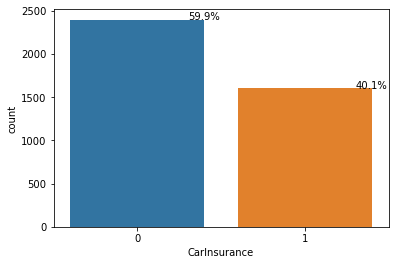

In [429]:
ax = sns.countplot(x='CarInsurance', data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [430]:
df

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0


In [431]:
start = []
for time in df['CallStart']:
    start.append(pd.Timedelta(time).seconds)

end = []
for time in df['CallEnd']:
    end.append(pd.Timedelta(time).seconds)


call_duration = []
for s, e in zip(pd.Series(start), pd.Series(end)):
    call_duration.append(e-s)

df['Call_duration'] = call_duration

In [432]:
df

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,Call_duration
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0,70
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0,185
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1,340
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1,819
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1,269
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0,125
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0,290
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0,99


In [433]:
df = df.drop(['CallStart','CallEnd','Id'],axis=1)

In [434]:
df.isnull().sum()

Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CarInsurance           0
Call_duration          0
dtype: int64

In [435]:
def fillna(series: pd.Series) -> pd.Series:
    """
    Function which fills "None"
    for categorical and numeric data
    """
    if (series.dtype is pd.np.dtype(float)) | (series.dtype is pd.np.dtype(int)):
        return series.fillna(series.median())
    elif series.dtype is pd.np.dtype(object):
        if series.mode()[0]!=None:
            return series.fillna(series.mode()[0])
        else:
            return series.fillna('None')
    else:
        return series

In [436]:
df = df.apply(fillna)

In [437]:
df.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CarInsurance        0
Call_duration       0
dtype: int64

In [438]:
df = pd.get_dummies(df, drop_first=False)
df

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,...,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_failure,Outcome_other,Outcome_success
0,32,0,1218,1,0,28,2,-1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,32,0,1156,1,0,26,5,-1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,29,0,637,1,0,3,1,119,1,1,...,0,1,0,0,0,0,0,1,0,0
3,25,0,373,1,0,11,2,-1,0,1,...,0,0,0,1,0,0,0,1,0,0
4,30,0,2694,0,0,3,1,-1,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,28,0,0,1,0,25,1,40,2,1,...,0,0,0,1,0,0,0,1,0,0
3996,49,0,124,1,1,29,19,-1,0,0,...,1,0,0,0,0,0,0,1,0,0
3997,27,0,-400,0,1,8,1,-1,0,0,...,1,0,0,0,0,0,0,1,0,0
3998,36,0,658,1,0,29,1,227,3,0,...,0,0,0,0,0,0,0,1,0,0


In [439]:
X = df.drop(['CarInsurance'], axis=1)
y = df['CarInsurance']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, shuffle=True, random_state=random_state)

In [440]:
bgc = BaggingClassifier().fit(X_train, y_train)

y_pred = bgc.predict(X_test)
y_score = bgc.predict_proba(X_test)[:, 1:]

print('roc-auc:', roc_auc_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('logloss:', log_loss(y_test, y_pred))
print(classification_report(y_test, y_pred))

roc-auc: 0.812263997768517
precision: 0.7866323907455013
recall: 0.7630922693266833
f1: 0.7746835443037974
logloss: 6.1479685648808085
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       599
           1       0.79      0.76      0.77       401

    accuracy                           0.82      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.82      0.82      0.82      1000



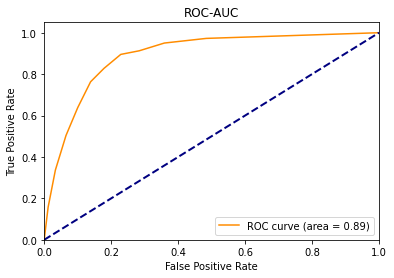

In [441]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')
plt.legend(loc="lower right")
plt.show()

In [442]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_score = rf.predict_proba(X_test)[:, 1:]

print('roc-auc:', roc_auc_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('logloss:', log_loss(y_test, y_pred))
print(classification_report(y_test, y_pred))

roc-auc: 0.833069663071037
precision: 0.8071065989847716
recall: 0.7930174563591023
f1: 0.8
logloss: 5.491726216195493
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       599
           1       0.81      0.79      0.80       401

    accuracy                           0.84      1000
   macro avg       0.84      0.83      0.83      1000
weighted avg       0.84      0.84      0.84      1000



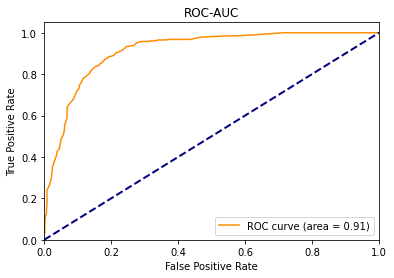

In [443]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')
plt.legend(loc="lower right")
plt.show()

In [444]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}


grid_cv = GridSearchCV(rf, params, scoring='roc_auc', verbose=2)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]},
             scoring='roc_auc', verbose=2)

In [445]:
grid_cv.best_score_

0.9094737805129937

In [446]:
grid_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [447]:
rf = RandomForestClassifier(**grid_cv.best_params_)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_score = rf.predict_proba(X_test)[:, 1:]

print('roc-auc:', roc_auc_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('logloss:', log_loss(y_test, y_pred))
print(classification_report(y_test, y_pred))

roc-auc: 0.825207432170825
precision: 0.8221024258760108
recall: 0.7605985037406484
f1: 0.7901554404145078
logloss: 5.595334549405924
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       599
           1       0.82      0.76      0.79       401

    accuracy                           0.84      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.84      0.84      0.84      1000



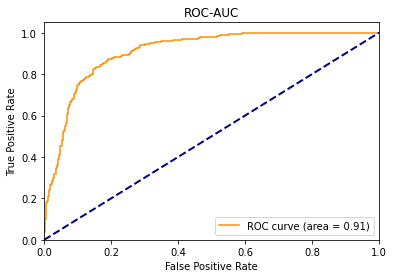

In [448]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')
plt.legend(loc="lower right")
plt.show()

In [449]:
perm = PermutationImportance(rf).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.2179 ± 0.0093,Call_duration
0.0224 ± 0.0028,Age
0.0179 ± 0.0061,HHInsurance
0.0133 ± 0.0037,LastContactDay
0.0116 ± 0.0029,Balance
0.0097 ± 0.0020,Marital_married
0.0070 ± 0.0018,LastContactMonth_may
0.0062 ± 0.0035,DaysPassed
0.0062 ± 0.0034,Outcome_failure
0.0057 ± 0.0009,Marital_single
